Customer Data Summary Statistics:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00

Product Data Summary Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transaction Data Summary Statistics:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   4

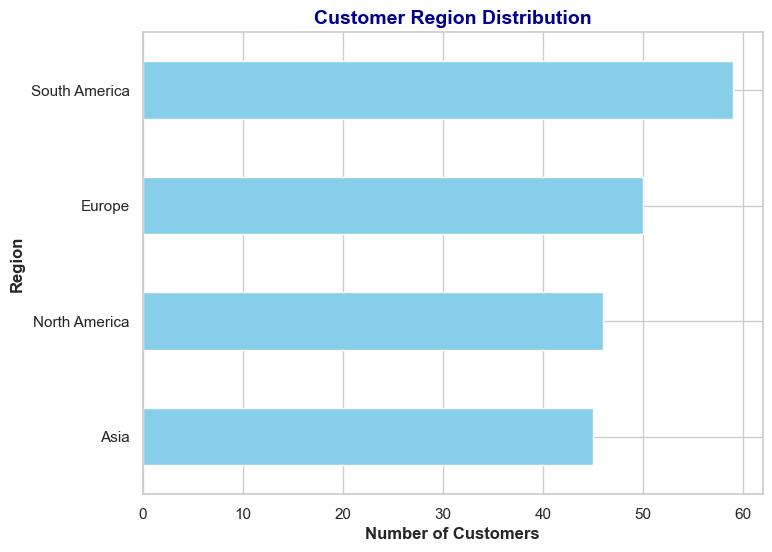


2. Product Categories Sales:
• Electronics and Books are the top-performing categories.
• Clothing and Home Decor have lower sales, indicating a need for promotions.
• Focusing on high-performing categories like Electronics can drive revenue growth.


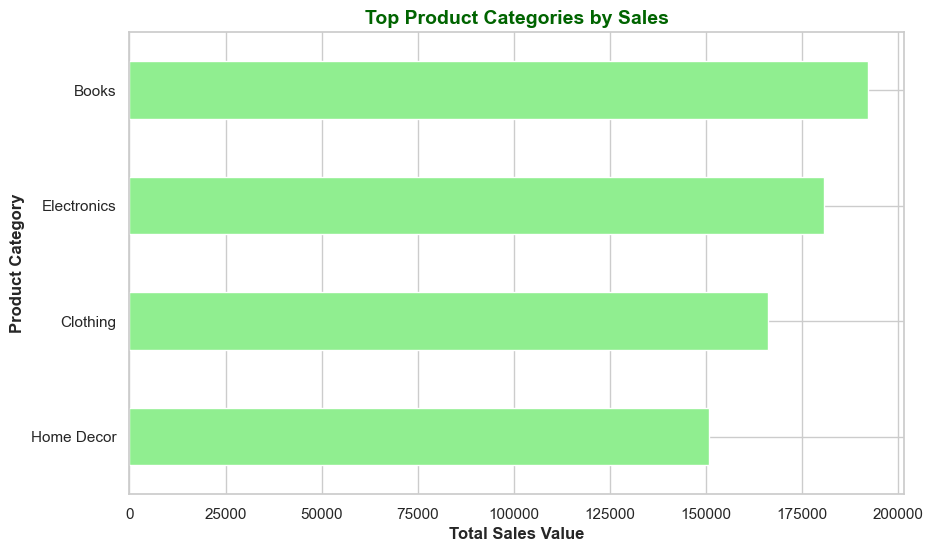


3. Seasonal Sales Patterns:
• Sales peak during mid-year (Jun-Jul) and year-end (Dec).
• Lower sales in Jan-Feb and Sep-Oct suggest opportunities for targeted campaigns.
• Understanding these trends helps in planning inventory and marketing budgets.


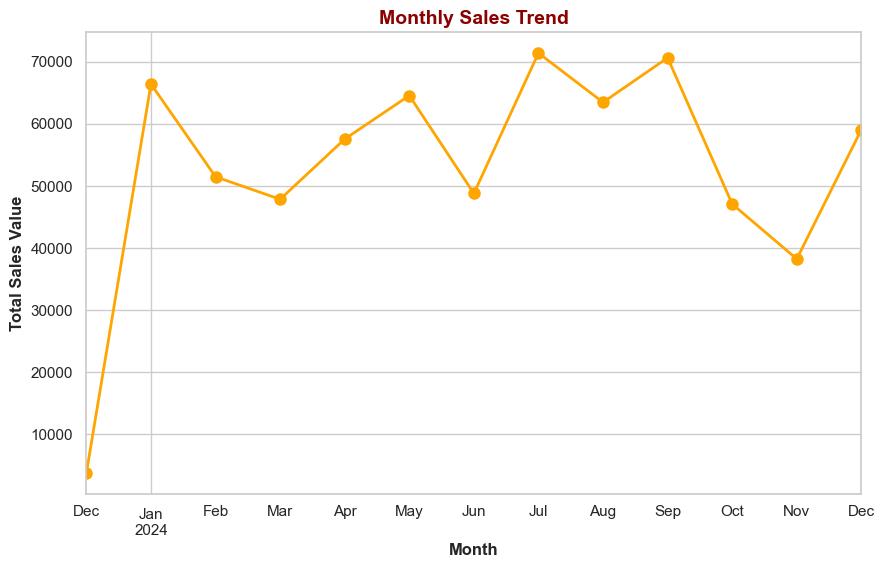


4. Top Customers Insights:
• The top 10 customers contribute significantly to overall revenue.
• High-value customers should be targeted with loyalty programs and exclusive offers.
• Analyzing their behavior provides insights into product preferences and upselling.


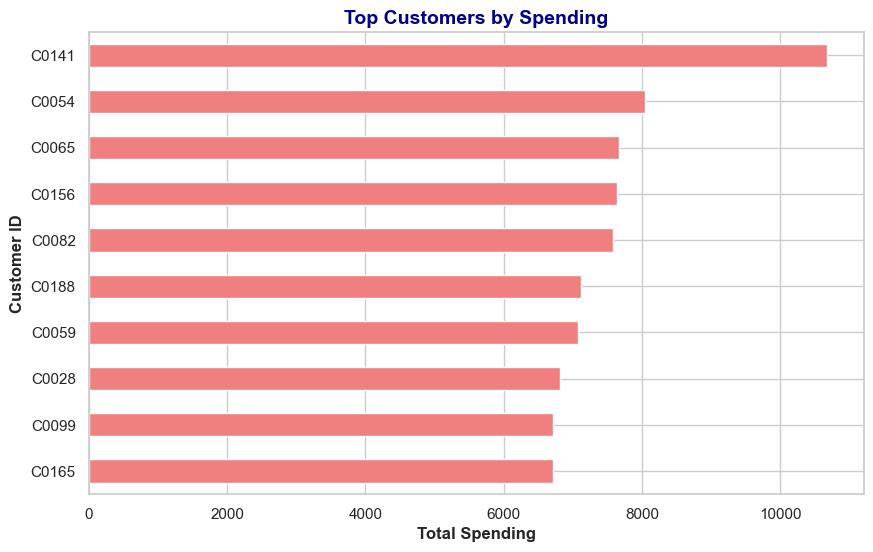


5. Average Transaction Value by Region:
• South America has the highest average transaction value, indicating premium preferences.
• South America and Asia show lower spending, suggesting pricing adjustments.
• Regional variations guide high-margin product strategies and localized campaigns.


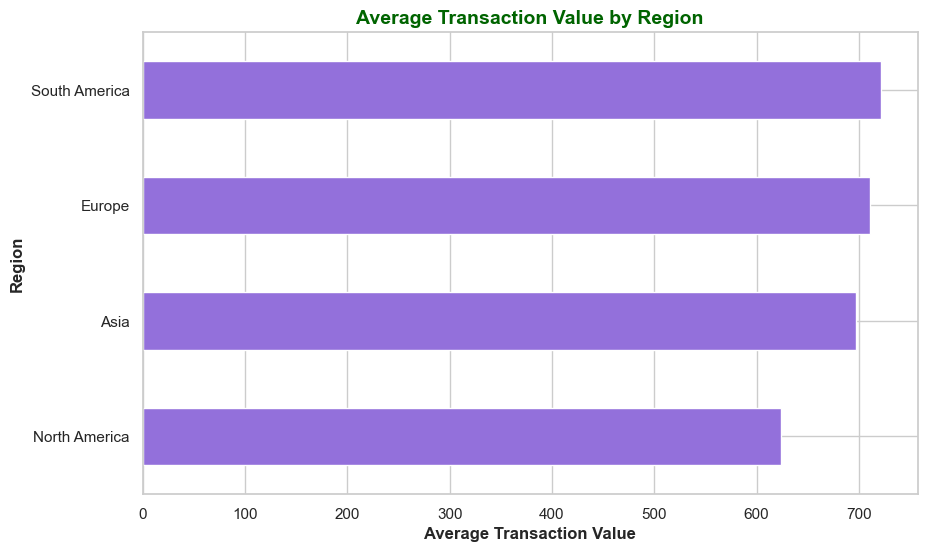

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load datasets
df_customers_shivani = pd.read_csv("Customers.csv")
df_products_shivani = pd.read_csv("Products.csv")
df_transactions_shivani = pd.read_csv("Transactions.csv")

# Data Cleaning
df_customers_shivani['SignupDate'] = pd.to_datetime(df_customers_shivani['SignupDate'])
df_transactions_shivani['TransactionDate'] = pd.to_datetime(df_transactions_shivani['TransactionDate'])

# Summary Statistics
print("Customer Data Summary Statistics:")
print(df_customers_shivani.describe())
print("\nProduct Data Summary Statistics:")
print(df_products_shivani.describe())
print("\nTransaction Data Summary Statistics:")
print(df_transactions_shivani.describe())

# 1. Customer Region Distribution
region_counts_shivani = df_customers_shivani['Region'].value_counts().sort_values(ascending=True)

print("\n1. Customer Region Distribution:")
print("• The majority of customers are concentrated in South America and Europe.")
print("• North America and Asia have fewer customers, suggesting untapped potential.")
print("• Marketing efforts should focus on high-concentration regions for better ROI.")

plt.figure(figsize=(8,6))
region_counts_shivani.plot(kind='barh', title='Customer Region Distribution', color='skyblue')
plt.xlabel('Number of Customers', fontsize=12, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')
plt.title('Customer Region Distribution', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

# 2. Product Categories Sales
df_merged_shivani = df_transactions_shivani.merge(df_products_shivani, on='ProductID')
category_sales_shivani = df_merged_shivani.groupby('Category')['TotalValue'].sum().sort_values(ascending=True)

print("\n2. Product Categories Sales:")
print("• Electronics and Books are the top-performing categories.")
print("• Clothing and Home Decor have lower sales, indicating a need for promotions.")
print("• Focusing on high-performing categories like Electronics can drive revenue growth.")

plt.figure(figsize=(10,6))
category_sales_shivani.plot(kind='barh', title='Top Product Categories by Sales', color='lightgreen')
plt.xlabel('Total Sales Value', fontsize=12, fontweight='bold')
plt.ylabel('Product Category', fontsize=12, fontweight='bold')
plt.title('Top Product Categories by Sales', fontsize=14, fontweight='bold', color='darkgreen')
plt.show()

# 3. Monthly Sales Trend
df_transactions_shivani['Month'] = df_transactions_shivani['TransactionDate'].dt.to_period('M')
monthly_sales_shivani = df_transactions_shivani.groupby('Month')['TotalValue'].sum()

print("\n3. Seasonal Sales Patterns:")
print("• Sales peak during mid-year (Jun-Jul) and year-end (Dec).")
print("• Lower sales in Jan-Feb and Sep-Oct suggest opportunities for targeted campaigns.")
print("• Understanding these trends helps in planning inventory and marketing budgets.")

plt.figure(figsize=(10,6))
monthly_sales_shivani.plot(marker='o', color='orange', linewidth=2, markersize=8)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales Value', fontsize=12, fontweight='bold')
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold', color='darkred')
plt.grid(True)
plt.show()

# 4. Top Customers by Spending
top_spenders_shivani = df_transactions_shivani.groupby('CustomerID')['TotalValue'].sum().nlargest(10).sort_values(ascending=True)

print("\n4. Top Customers Insights:")
print("• The top 10 customers contribute significantly to overall revenue.")
print("• High-value customers should be targeted with loyalty programs and exclusive offers.")
print("• Analyzing their behavior provides insights into product preferences and upselling.")

plt.figure(figsize=(10,6))
top_spenders_shivani.plot(kind='barh', title='Top Customers by Spending', color='lightcoral')
plt.xlabel('Total Spending', fontsize=12, fontweight='bold')
plt.ylabel('Customer ID', fontsize=12, fontweight='bold')
plt.title('Top Customers by Spending', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

# 5. Average Transaction Value by Region
df_merged_customers_shivani = df_transactions_shivani.merge(df_customers_shivani, on='CustomerID')
region_avg_spending_shivani = df_merged_customers_shivani.groupby('Region')['TotalValue'].mean().sort_values(ascending=True)

print("\n5. Average Transaction Value by Region:")
print("• South America has the highest average transaction value, indicating premium preferences.")
print("• South America and Asia show lower spending, suggesting pricing adjustments.")
print("• Regional variations guide high-margin product strategies and localized campaigns.")

plt.figure(figsize=(10,6))
region_avg_spending_shivani.plot(kind='barh', title='Average Transaction Value by Region', color='mediumpurple')
plt.xlabel('Average Transaction Value', fontsize=12, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')
plt.title('Average Transaction Value by Region', fontsize=14, fontweight='bold', color='darkgreen')
plt.show()